In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import re

from sklearn.decomposition import PCA, SparsePCA,TruncatedSVD
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score
from pymongo import MongoClient
import re

from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


%matplotlib inline

In [2]:
cd Dimension\ Reduction

/Users/evansadler/Desktop/Project Files/Dimension Reduction


In [3]:
df_c = pd.read_csv('crime_pca_data.csv')

In [4]:
df_z = pd.read_csv('zillow_pca_data.csv')

In [5]:
df_f = df_c.merge(df_z, on='hood')

In [6]:
df_y = pd.read_csv('yelp_pca_data.csv')

In [92]:
df_s = pd.read_csv('school_data.csv')
df_s = pd.DataFrame(df_s.groupby('hood').mean()).reset_index()


In [7]:
cd ..

/Users/evansadler/Desktop/Project Files


In [8]:
cd feature\ engineering

/Users/evansadler/Desktop/Project Files/feature engineering


In [9]:
from walkscore_features import WalkscoreFeatures

w = WalkscoreFeatures('Seattle', 'WA')
df_ws = w.engineer_features()
#df_ws['id'] = df_ws['id'].astype(int)

In [10]:
x = df_ws.ix[df_ws['hood'].isin(['East Queen Anne','West Queen Anne', 'North Queen Anne']), :].mean()
x['hood'] = 'Queen Anne'
df_ws = df_ws.append(x,ignore_index=True)

x = df_ws.ix[df_ws['hood'].isin(['Seaview','Junction']), :].mean()
x['hood'] = 'West Seattle'
df_ws = df_ws.append(x,ignore_index=True)

df_ws.ix[df_ws['hood'] == 'Denny - Blaine', 'hood'] = 'Denny-Blaine'
df_ws.ix[df_ws['hood'] == 'Central', 'hood'] = 'Central District'
df_ws.ix[df_ws['hood'] == 'Mt. Baker', 'hood'] = 'Mount Baker'

#df_ws = df_ws.drop(df_ws['hood'].isin(['Junction','Seaview','Mt. Baker','East Queen Anne','West Queen Anne', 'North Queen Anne']), axis = 0)

In [85]:
dff = df_ws.merge(df_f, on = 'hood', how = 'right')

78

In [95]:
df_s.merge(dff, on = 'hood', how = 'right')

,hood,gsRating_high,parRating_high,gsRating_middle,parRating_middle,gsRating,parRating,transit_score,walkscore,theft-burglary,assualt-drugs,homicide,family vs single,expensiveness,Age
0,Admiral,7,4,8,4,8.5,3.500000,44.304348,59.782609,0.046937,0.030760,-0.060680,5.558095e-02,-2.343493e-02,7.024630e-02
1,Alki,7,4,8,4,7.0,4.000000,33.916667,47.041667,0.061486,0.032687,-0.060680,-5.945301e-03,-4.769852e-02,6.016826e-02
2,Arbor Heights,5,3,6,3,6.0,4.000000,38.625000,23.812500,0.077862,0.023654,-0.060680,1.620333e-01,1.020255e-01,4.878084e-02
3,Atlantic,6,4,7,4,10.0,5.000000,68.000000,78.500000,0.041756,-0.021844,0.056185,3.511252e-02,2.656776e-02,1.751289e-02
4,Ballard,9,4,10,3,8.5,4.500000,51.000000,92.190476,-0.168464,-0.010478,-0.060680,-1.419945e-01,3.196798e-02,6.000013e-02
5,Beacon Hill,7,4,9,4,6.5,4.333333,53.960000,61.320000,-0.224588,-0.035168,0.523642,1.251524e-01,1.416970e-01,5.298150e-02
6,Belltown,6,4,8,3,4.0,4.000000,95.312500,96.312500,-0.097467,-0.072482,0.114617,-2.351364e-01,-3.631028e-02,-1.171770e-01
7,Bitter Lake,6,4,7,3,6.0,3.000000,47.904762,58.047619,0.020164,0.027618,-0.060680,-5.578202e-02,7.428270e-02,2.961738e-01
8,Blue Ridge,6,4,7,3,10.0,4.000000,45.285714,48.000000,0.088344,0.049154,-0.060680,7.100826e-02,-4.602004e-02,7.256605e-02
9,Broadmoor,6,4,7,4,8.0,4.000000,40.222222,35.777778,0.102181,0.048176,-0.060680,4.267191e-02,-1.388994e-01,2.345875e-01


,hood,gsRating_high,parRating_high,gsRating_middle,parRating_middle,gsRating,parRating
0,Admiral,7,4,8,4,8.5,3.500000
1,Alki,7,4,8,4,7.0,4.000000
2,Arbor Heights,5,3,6,3,6.0,4.000000
3,Atlantic,6,4,7,4,10.0,5.000000
4,Ballard,9,4,10,3,8.5,4.500000
5,Beacon Hill,7,4,9,4,6.5,4.333333
6,Belltown,6,4,8,3,4.0,4.000000
7,Bitter Lake,6,4,7,3,6.0,3.000000
8,Blue Ridge,6,4,7,3,10.0,4.000000
9,Broadmoor,6,4,7,4,8.0,4.000000


In [13]:
df_final = df_y.merge(dff, on = 'hood', how = 'right')

In [17]:
cd ..

/Users/evansadler/Desktop/Project Files


In [18]:
cd Dimension\ Reduction

/Users/evansadler/Desktop/Project Files/Dimension Reduction


In [19]:
from pca_class import ReduceFeatures

In [65]:
rf = ReduceFeatures(df_final, df_final.hood)
rf.preprocessing(0)
rf.hcluster_cols(0.1)
rf.preprocessing(0)
df_c = rf.fit_pca(n_components = 3)
rf.best_cluster()

[ 0.51872478  0.1204441   0.10502812]
For n_clusters = 3 The average silhouette_score is : 0.491791783325
For n_clusters = 4 The average silhouette_score is : 0.337953629817
For n_clusters = 5 The average silhouette_score is : 0.350297043617
For n_clusters = 6 The average silhouette_score is : 0.298720487235
For n_clusters = 7 The average silhouette_score is : 0.303379884698
For n_clusters = 8 The average silhouette_score is : 0.298756218108
For n_clusters = 9 The average silhouette_score is : 0.287335608868
For n_clusters = 10 The average silhouette_score is : 0.289476613424


In [66]:
df_c.sort(3)

,1,2,3
theft-burglary,-0.329346,0.011153,-0.323683
walkscore,0.305401,0.341076,-0.321324
transit_score,0.327143,0.185027,-0.241681
assualt-drugs,-0.343515,0.299011,-0.101479
shopping-food,-0.379569,0.189470,-0.067281
Age,-0.037549,-0.603852,-0.063173
nightlife,-0.359732,0.117682,-0.062541
art,-0.386026,0.115476,0.035815
family vs single,-0.298260,-0.319581,0.345781
homicide,0.244886,-0.032114,0.467629


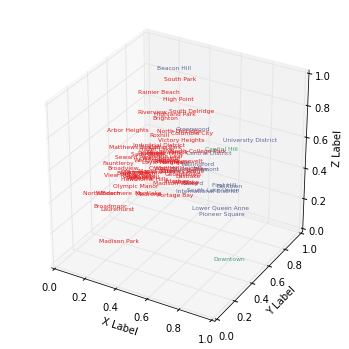

In [67]:
rf.plot_embedding()

In [74]:
df_final.to_csv('final_1.csv', index = False)

,hood,shopping-food,nightlife,art,transit_score,walkscore,theft-burglary,assualt-drugs,homicide,family vs single,expensiveness,Age
0,Admiral,0.020001,0.011702,0.042006,44.304348,59.782609,0.046937,0.030760,-0.060680,5.558095e-02,-2.343493e-02,7.024630e-02
1,Alki,0.038414,0.032803,0.056722,33.916667,47.041667,0.061486,0.032687,-0.060680,-5.945301e-03,-4.769852e-02,6.016826e-02
2,Arbor Heights,0.068270,0.059178,0.061628,38.625000,23.812500,0.077862,0.023654,-0.060680,1.620333e-01,1.020255e-01,4.878084e-02
3,Atlantic,0.031444,0.053903,0.056722,68.000000,78.500000,0.041756,-0.021844,0.056185,3.511252e-02,2.656776e-02,1.751289e-02
4,Ballard,-0.253811,-0.310078,-0.178738,51.000000,92.190476,-0.168464,-0.010478,-0.060680,-1.419945e-01,3.196798e-02,6.000013e-02
5,Beacon Hill,-0.049643,0.038078,0.027290,53.960000,61.320000,-0.224588,-0.035168,0.523642,1.251524e-01,1.416970e-01,5.298150e-02
6,Belltown,-0.121669,-0.204577,-0.178738,95.312500,96.312500,-0.097467,-0.072482,0.114617,-2.351364e-01,-3.631028e-02,-1.171770e-01
7,Bitter Lake,0.015703,0.048628,0.046912,47.904762,58.047619,0.020164,0.027618,-0.060680,-5.578202e-02,7.428270e-02,2.961738e-01
8,Blue Ridge,0.068032,0.059178,0.066533,45.285714,48.000000,0.088344,0.049154,-0.060680,7.100826e-02,-4.602004e-02,7.256605e-02
9,Brighton,0.045471,0.059178,0.066533,60.300000,71.500000,-0.014684,0.001001,0.114617,1.083094e-01,1.633975e-01,3.010971e-02


In [127]:
df_f.ix[df_f['hood'] == 'Beacon Hill', :]

,id,transit_score,walkscore,hood,crime,serious crime,prostitution,family vs single,expensiveness,Age,active,arts,nightlife,restaurants,shopping
1,250050,53.96,61.32,Beacon Hill,-0.080443,0.009634,0.519038,0.113373,-0.115577,0.066851,75,47,32,179,170


DIMENSION REDUCTION WOOO.ipynb  feature engineering/
DR DEMO.ipynb                   get squares.ipynb
Dimension Reduction/            highschools.json
Untitled Folder/                homepage.html
combine data.ipynb              old files - ignore/
crime pca.ipynb                 pca_zillow.ipynb
data collection/                seattle.json


In [14]:
df_y

,hood,shopping-food,nightlife,art
0,Admiral,0.020001,0.011702,0.042006
1,Alki,0.038414,0.032803,0.056722
2,Arbor Heights,0.068270,0.059178,0.061628
3,Atlantic,0.031444,0.053903,0.056722
4,Ballard,-0.253811,-0.310078,-0.178738
5,Beacon Hill,-0.049643,0.038078,0.027290
6,Belltown,-0.121669,-0.204577,-0.178738
7,Bitter Lake,0.015703,0.048628,0.046912
8,Blue Ridge,0.068032,0.059178,0.066533
9,Brighton,0.045471,0.059178,0.066533


,hood,theft-burglary,assualt-drugs,homicide
0,Admiral,0.046937,0.030760,-0.060680
1,Alki,0.061486,0.032687,-0.060680
2,Arbor Heights,0.077862,0.023654,-0.060680
3,Atlantic,0.041756,-0.021844,0.056185
4,Ballard,-0.168464,-0.010478,-0.060680
5,Beacon Hill,-0.224588,-0.035168,0.523642
6,Belltown,-0.097467,-0.072482,0.114617
7,Bitter Lake,0.020164,0.027618,-0.060680
8,Blue Ridge,0.088344,0.049154,-0.060680
9,Brighton,-0.014684,0.001001,0.114617


In [13]:
df_y

,hood,shopping-food,nightlife,art
0,Admiral,0.020833,0.012412,0.042876
1,Alki,0.039289,0.033550,0.057625
2,Arbor Heights,0.069221,0.059972,0.062542
3,Atlantic,0.032310,0.054688,0.057625
4,Ballard,-0.253612,-0.309940,-0.178364
5,Beacon Hill,-0.048974,0.038835,0.028127
6,Belltown,-0.121172,-0.204251,-0.178364
7,Bitter Lake,0.016531,0.049404,0.047792
8,Blue Ridge,0.068982,0.059972,0.067458
9,Brighton,0.046366,0.059972,0.067458
